# Doctor's Consultation Fees Prediction

## Context:
To build a model to predict the doctor's consulting fee

## Features:
Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',100)
print("import complete")

import complete


### Loading the dataset 

In [2]:
train_df = pd.read_excel("Doctor_Fees_Train.xlsx")
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
test_df = pd.read_excel("Doctor_Fees_Test.xlsx")
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


### Exploratory Data Analysis

#### Data Preparation and Exploration

In [4]:
#checking shape of dataset
train_df.shape, test_df.shape

((5961, 7), (1987, 6))

In [5]:
#checking datatypes of train and test data
train_df.dtypes, test_df.dtypes

(Qualification         object
 Experience            object
 Rating                object
 Place                 object
 Profile               object
 Miscellaneous_Info    object
 Fees                   int64
 dtype: object,
 Qualification         object
 Experience            object
 Rating                object
 Place                 object
 Profile               object
 Miscellaneous_Info    object
 dtype: object)

In [6]:
#checking info about the dataset
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile    

(None, None)

There are 6 categorical variables in train dataset and 5 categorical variables in test dataset and 1 numerical variable in train dataset which is the target variable.

In [7]:
# checking columns of datasets
train_df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [8]:
test_df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [9]:
# manipulating Experience column
exp = train_df.Experience.str.rstrip("years experience")
train_df.Experience = exp.astype(int)

exp = test_df.Experience.str.rstrip("years experience")
test_df.Experience = exp.astype(int)

In [10]:
# manipulating rating column
rating = train_df.Rating.str.rstrip("%")
train_df.Rating = pd.to_numeric(rating,errors='ignore')

rating = test_df.Rating.str.rstrip("%")
test_df.Rating = pd.to_numeric(rating,errors='ignore')

In [11]:
# manipulating place column

district = train_df.Place.str.split(",").str[0]
city = train_df.Place.str.split(",").str[1]

train_df['District']=district
train_df['City']=city
train_df.drop(['Place'],axis=1,inplace=True)

district = test_df.Place.str.split(",").str[0]
city = test_df.Place.str.split(",").str[1]

test_df['District']=district
test_df['City']=city
test_df.drop(['Place'],axis=1,inplace=True)

In [12]:
# since Miscellaneous_Info does not give relevant information will drop it
train_df.drop(['Miscellaneous_Info'],axis=1,inplace=True)
test_df.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [13]:
train_df.head()

,Qualification,Experience,Rating,Profile,Fees,District,City
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,100.0,Ayurveda,250,Keelkattalai,Chennai


In [14]:
# Analysing numerical columns
num = [var for var in train_df.columns if var not in train_df.select_dtypes("O")]
for var in num:
    print("No of unique values in {} are {}".format(var,train_df[var].nunique()))

No of unique values in Experience are 64
No of unique values in Rating are 51
No of unique values in Fees are 40


In [15]:
# statistical summary 
train_df[num].describe()

,Experience,Rating,Fees
count,5961.000000,2659.000000,5961.000000
mean,17.303976,94.643475,307.944640
std,11.142798,7.852813,190.920373
min,0.000000,7.000000,5.000000
25%,9.000000,93.000000,150.000000
50%,14.000000,97.000000,300.000000
75%,23.000000,100.000000,500.000000
max,66.000000,100.000000,950.000000


- Majorly doctors have experience of about 17 yrs
- Mostly ratings are around 94% 
- Mostly doctors charge fees around 300
- Data is not much spread for Experience and rating but highly spread for Fees column which means that data points are close to mean in the case of Experience and Rating, and more far from mean in case of fees.

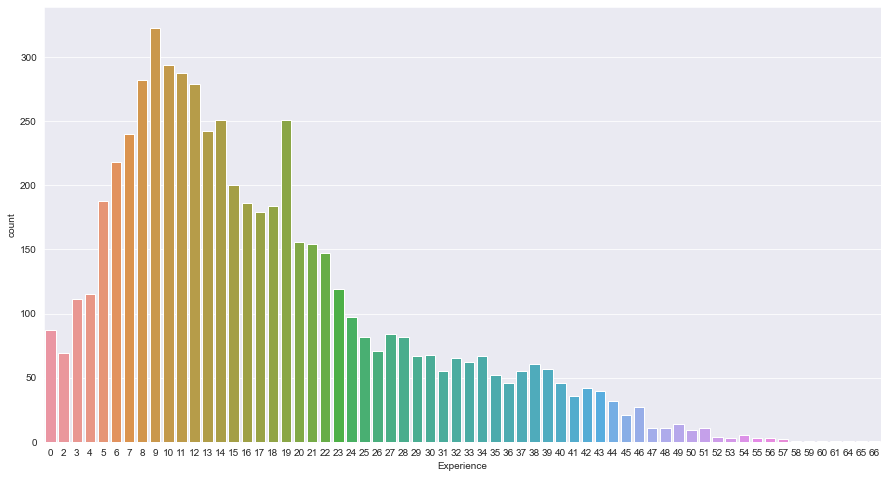

In [16]:
# Ananlyising Experience
plt.figure(figsize=(15,8))
sns.countplot(train_df.Experience)
plt.show()

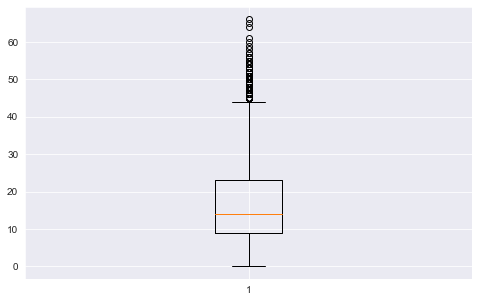

In [17]:
# Ananlyising Experience
plt.figure(figsize=(8,5))
plt.boxplot(train_df.Experience)
plt.show()

- The Highest number of doctors are having an experience of 9 years  
- Mostly doctors are having an experience of 7-15 yrs 
- Also there are outliers in the Experience variables 

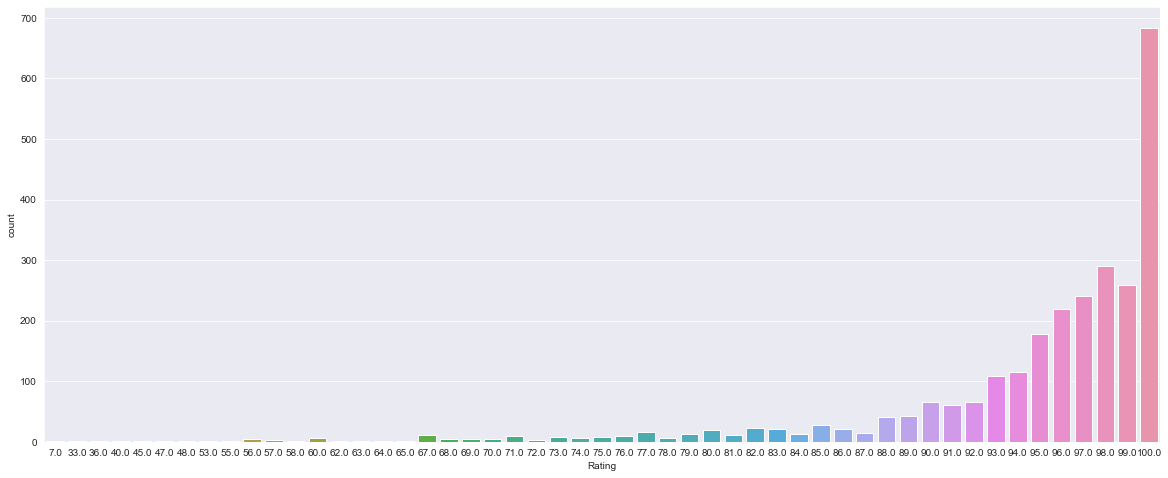

In [18]:
# Ananlyising Rating
plt.figure(figsize=(20,8))
sns.countplot(train_df.Rating)
plt.show()

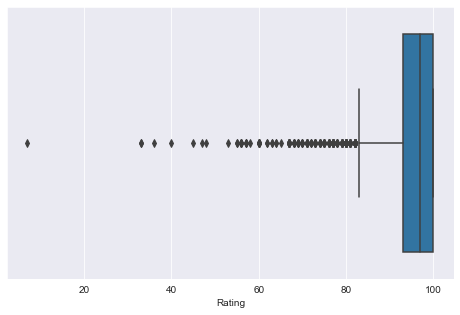

In [19]:
# Ananlyising Experience
plt.figure(figsize=(8,5))
sns.boxplot(train_df.Rating)
plt.show()

- Most of the doctors have a rating of 100 percent 
- There are outliers in Rating column

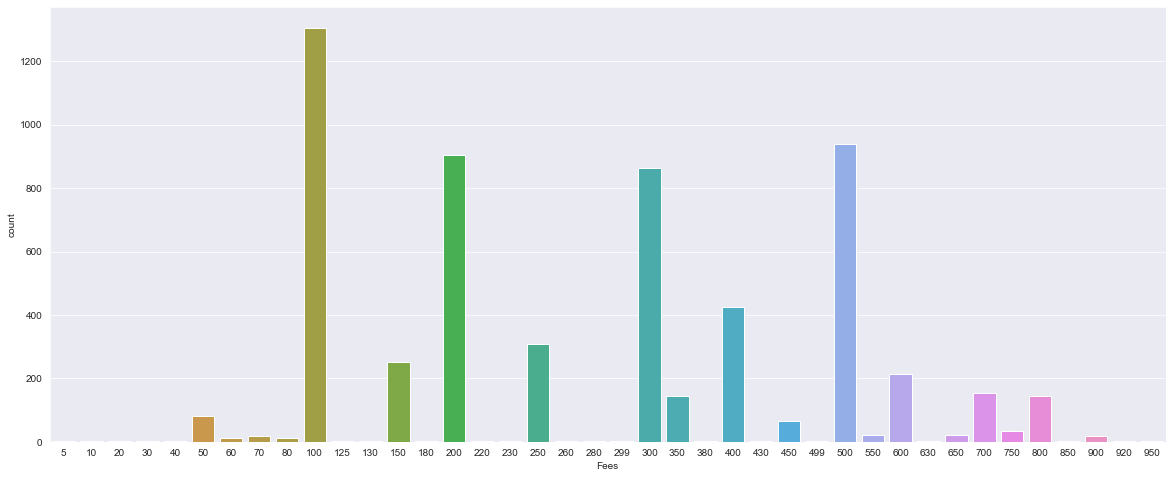

In [20]:
# Ananlyising Fees
plt.figure(figsize=(20,8))
sns.countplot(train_df.Fees)
plt.show()

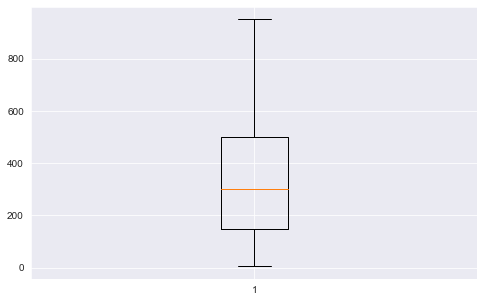

In [21]:
# Ananlyising Experience
plt.figure(figsize=(8,5))
plt.boxplot(train_df.Fees)
plt.show()

- Major number of doctors have a consulting fee of 100 rupees followed by 200,300 and 500
- There are no outliers in Fees column

In [22]:
# creating a new column with number of Qualifications
train_df['No_of_Qualification']=train_df.Qualification.apply(lambda x:len(x.split(",")))
train_df.No_of_Qualification.value_counts()

test_df['No_of_Qualification']=test_df.Qualification.apply(lambda x:len(x.split(",")))
test_df

,Qualification,Experience,Rating,Profile,District,City,No_of_Qualification
0,MBBS,35,NaN,General Medicine,Ghatkopar East,Mumbai,1
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,ENT Specialist,West Marredpally,Hyderabad,2
2,"MBBS, DDVL",40,70.0,Dermatologists,KK Nagar,Chennai,2
3,BAMS,0,NaN,Ayurveda,New Ashok Nagar,Delhi,1
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100.0,Dentist,Kanakpura Road,Bangalore,2
...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,NaN,Ayurveda,Basavanagudi,Bangalore,2
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,Dermatologists,Choolai,Chennai,3
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,General Medicine,Porur,Chennai,2
1985,BDS,12,98.0,Dentist,Arekere,Bangalore,1


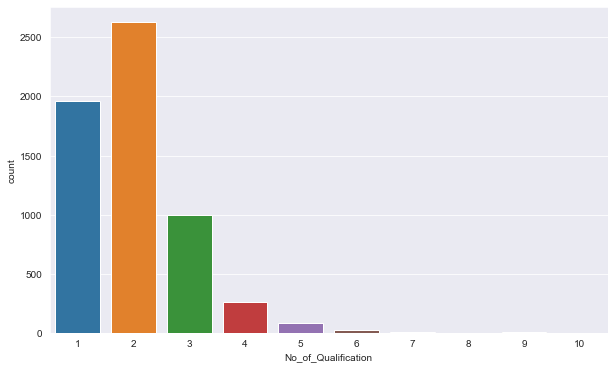

In [23]:
#Analysing Number of Qualifications column
plt.figure(figsize=(10,6))
sns.countplot(train_df.No_of_Qualification)
plt.show()

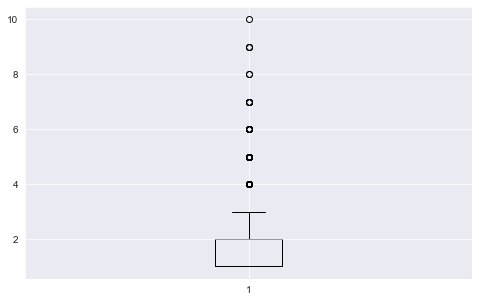

In [24]:
# Ananlyising No of Qualification
plt.figure(figsize=(8,5))
plt.boxplot(train_df.No_of_Qualification)
plt.show()

- Mostly doctors have 1 or 2 degrees 
- Doctors with more than 4 degrees are rare
- There are few outliers in the No_of_Qualification variables which are natural outliers 

In [25]:
# Analysing categorical columns
cat = [var for var in train_df.columns if var in train_df.select_dtypes("O")]
for var in cat:
    print("No of unique values in {} are {}".format(var,train_df[var].nunique()))

No of unique values in Qualification are 1420
No of unique values in Profile are 6
No of unique values in District are 866
No of unique values in City are 9


In [26]:
print("No of unique values in 'Profile' are {}".format(train_df['Profile'].unique()))
print("No of unique values in 'City' are {}".format(train_df['City'].unique()))

No of unique values in 'Profile' are ['Homeopath' 'Ayurveda' 'ENT Specialist' 'Dentist' 'General Medicine'
 'Dermatologists']
No of unique values in 'City' are [' Ernakulam' ' Bangalore' ' Chennai' ' Delhi' ' Hyderabad' ' Coimbatore'
 ' Mumbai' ' Thiruvananthapuram' nan ' Sector 5']


In [27]:
train_df['City']=np.where(train_df['City']==" Sector 5"," Delhi", train_df['City'])

<AxesSubplot:xlabel='City', ylabel='count'>

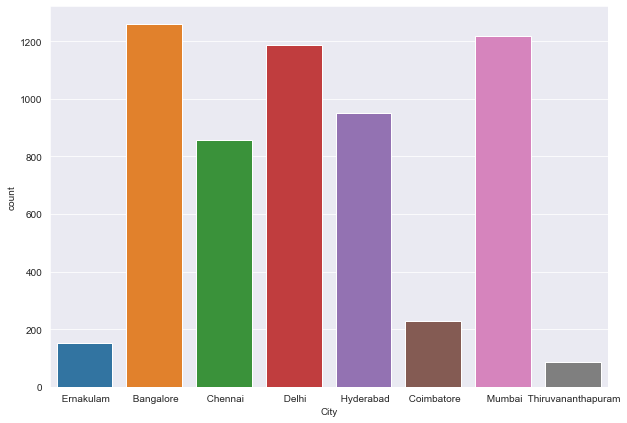

In [28]:
# checking distribution of cities
plt.figure(figsize=(10,7))
sns.countplot(data=train_df,x='City')

In [29]:
# statistical summary 
train_df[cat].describe()

,Qualification,Profile,District,City
count,5961,5961,5936,5935
unique,1420,6,866,8
top,BDS,Dentist,HSR Layout,Bangalore
freq,488,1397,75,1258


- Most of the doctors  hav BDS Qualification
- The profile is having majorly Dentists
- Bangalore and HSR Layout has the maximum frequency 

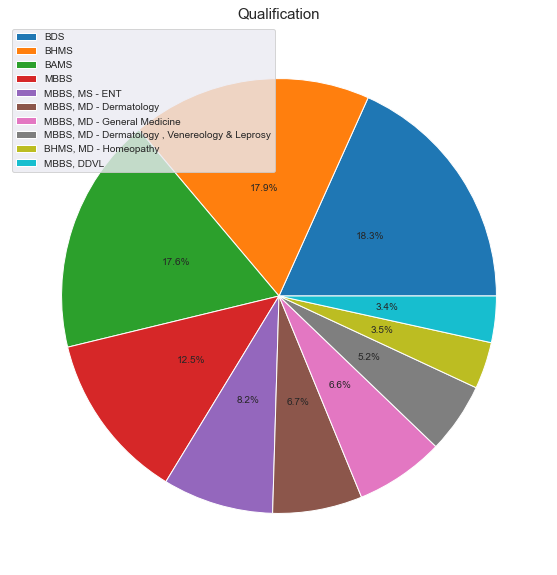

In [30]:
#Analysing top 10 frequent Qualifications
size = train_df.Qualification.value_counts()[:10]
plt.figure(figsize=(15,10))
plt.pie(size,labels=None,autopct="%1.1f%%",pctdistance=0.5)
plt.title("Qualification",fontsize=15)
plt.legend(labels=size.index,loc='upper left') 
plt.show()

- Majorly Doctors have BDS degree Followed by BHMS and BAMS
- Mostly Doctors have 1-3 degrees 

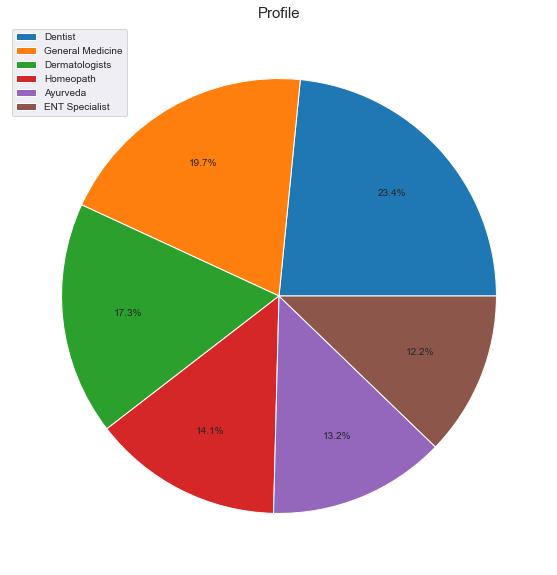

In [31]:
#Analysing Profiles
size = train_df.Profile.value_counts()
plt.figure(figsize=(15,10))
plt.pie(size,labels=None,autopct="%1.1f%%",pctdistance=0.7)
plt.title("Profile",fontsize=15)
plt.legend(labels=size.index,loc='upper left') 
plt.show()

- Majorly doctors are at dentist profiles
- ENT specialists are very less in number

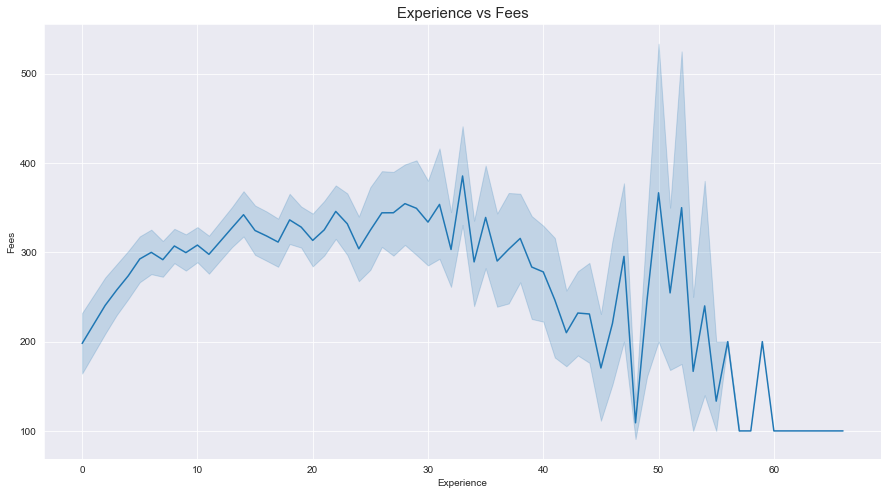

In [32]:
# Relationship between Fees and Experience
plt.figure(figsize=(15,8))
sns.lineplot(data=train_df,x='Experience',y='Fees')
plt.title("Experience vs Fees",fontsize=15)
plt.show()

- Fees increases as Eperience increses until the Experience is around 40 after which there is somewhat downfall in the fees
- Cannot see a specific relation between Fees and Experience i.e. cannot say that these variables are strongly correlated.

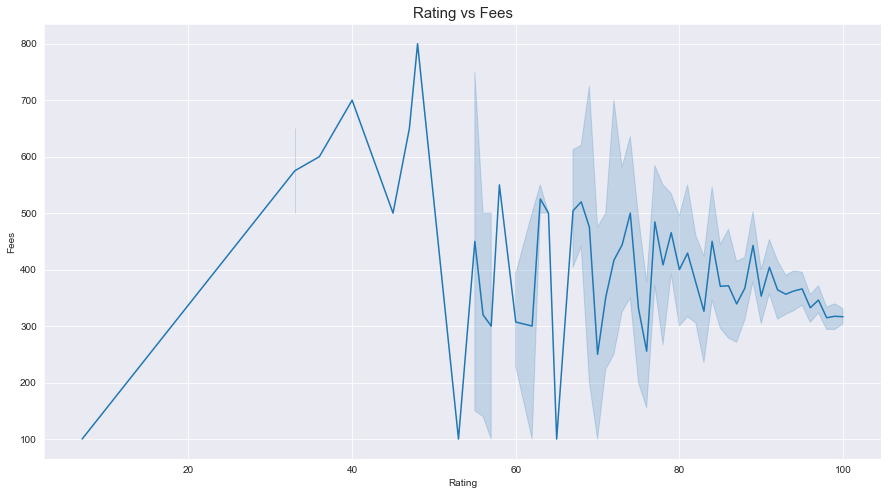

In [33]:
# Relationship between Fees and Experience
plt.figure(figsize=(15,8))
sns.lineplot(data=train_df,x='Rating',y='Fees')
plt.title("Rating vs Fees",fontsize=15)
plt.show()

- There is a significant rise in Fees when Rating increases untill its 40 after which it varies a lot
- Cannot see a specific relation between Fees and Rating i.e. cannot say that these variables are strongly correlated.

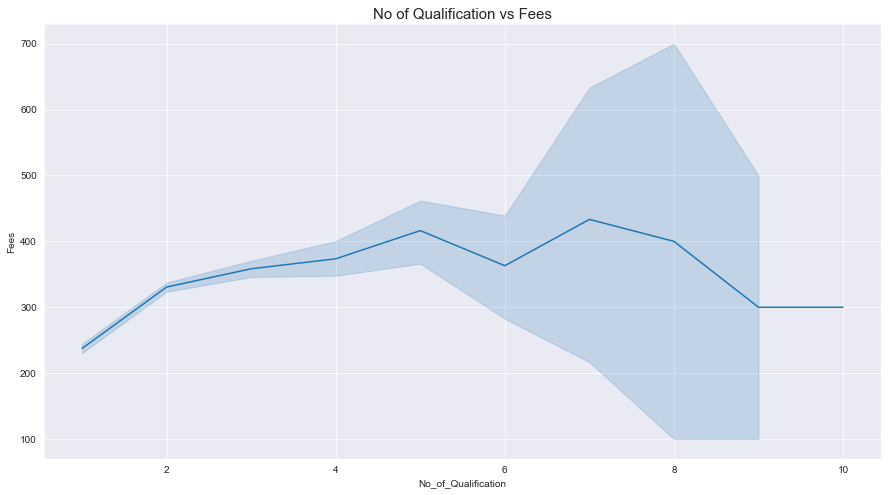

In [34]:
# Relationship between Fees and Experience
plt.figure(figsize=(15,8))
sns.lineplot(data=train_df,x='No_of_Qualification',y='Fees')
plt.title("No of Qualification vs Fees",fontsize=15)
plt.show()

- If a doctor has more number of qualifications fees will be higher, however it does not apply for more than 5 number of qualifications as it can vary after that as from above plot.
- There is somewhat linear relation between number of qualifications and fees, it is more correlated with fees than previous features.

In [35]:
train_df.columns

Index(['Qualification', 'Experience', 'Rating', 'Profile', 'Fees', 'District',
       'City', 'No_of_Qualification'],
      dtype='object')

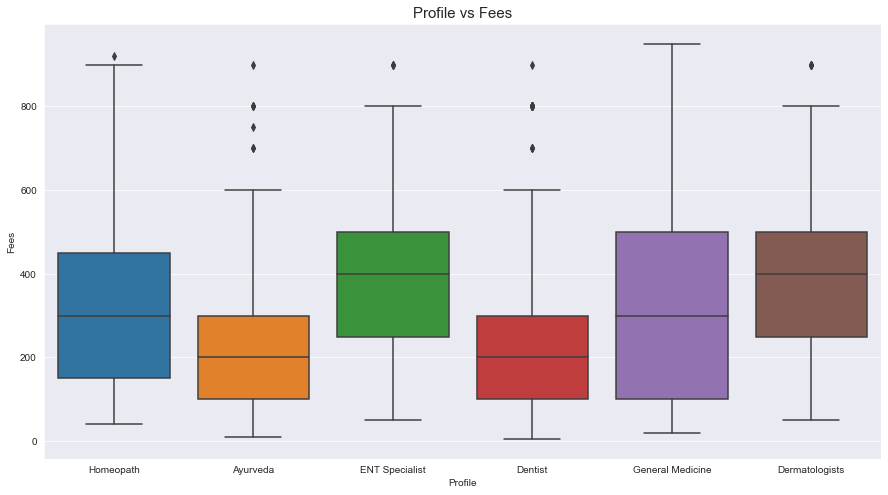

In [36]:
# Relationship between Fees and Profile
plt.figure(figsize=(15,8))
sns.boxplot(data=train_df,x='Profile',y='Fees')
plt.title("Profile vs Fees",fontsize=15)
plt.show()

- ENT Specialists and Dermatologists charge more fees than all other profiles with Ayurved and Dentists being the least.

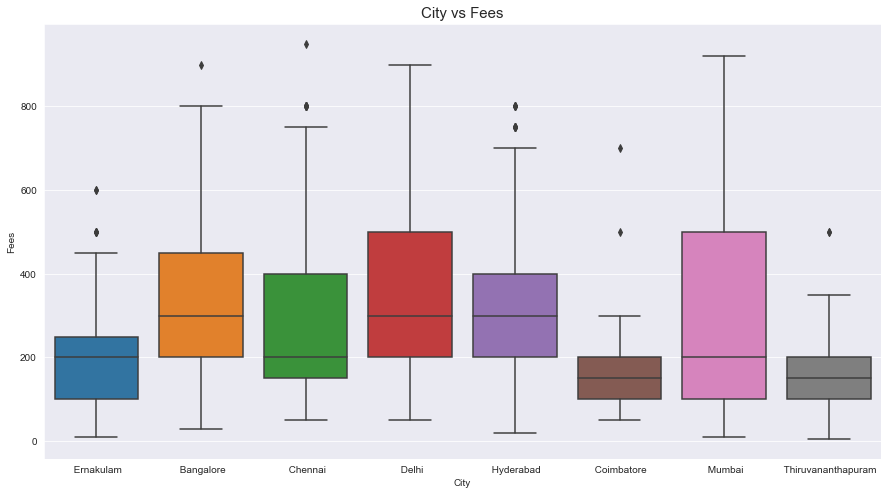

In [37]:
# Relationship between Fees and Profile
plt.figure(figsize=(15,8))
sns.boxplot(data=train_df,x='City',y='Fees')
plt.title("City vs Fees",fontsize=15)
plt.show()

- Doctors from Delhi charge more fees than all other cities
- Coimbatore has the least consultation charges

<AxesSubplot:>

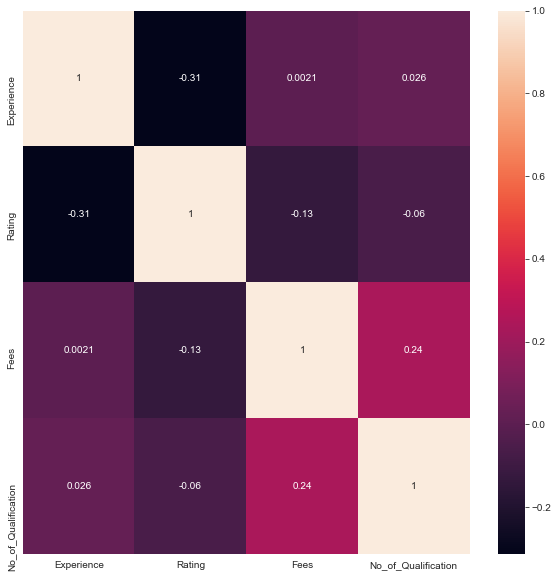

In [38]:
# checking correlation
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(),annot=True)

From the above plot we can see the correlation between the numerical features which will tell us about the strength of dependency of feature with another feature.

#### Missing Value Treatment

In [39]:
# checking null values

In [40]:
train_df.isnull()

,Qualification,Experience,Rating,Profile,Fees,District,City,No_of_Qualification
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
5956,False,False,False,False,False,False,False,False
5957,False,False,True,False,False,False,False,False
5958,False,False,False,False,False,False,False,False
5959,False,False,False,False,False,False,False,False


In [41]:
test_df.isnull()

,Qualification,Experience,Rating,Profile,District,City,No_of_Qualification
0,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1982,False,False,True,False,False,False,False
1983,False,False,True,False,False,False,False
1984,False,False,True,False,False,False,False
1985,False,False,False,False,False,False,False


There are missing values in the datasets

In [42]:
train_df.isnull().sum()

Qualification             0
Experience                0
Rating                 3302
Profile                   0
Fees                      0
District                 25
City                     26
No_of_Qualification       0
dtype: int64

In [43]:
test_df.isnull().sum()

Qualification             0
Experience                0
Rating                 1090
Profile                   0
District                  6
City                      6
No_of_Qualification       0
dtype: int64

Rating, District and City has missing values of which Rating is numerical column and District and City are categorical column.

<AxesSubplot:>

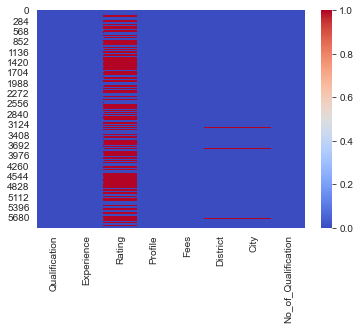

In [44]:
sns.heatmap(train_df.isnull(),cmap='coolwarm')

<AxesSubplot:>

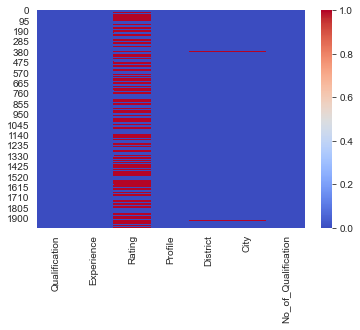

In [45]:
sns.heatmap(test_df.isnull(),cmap='coolwarm')

Will be using statisctical method to impute the missing values in Rating columns. Will be checking some relation of Rating with profiles to fill the missing values in a better manner.

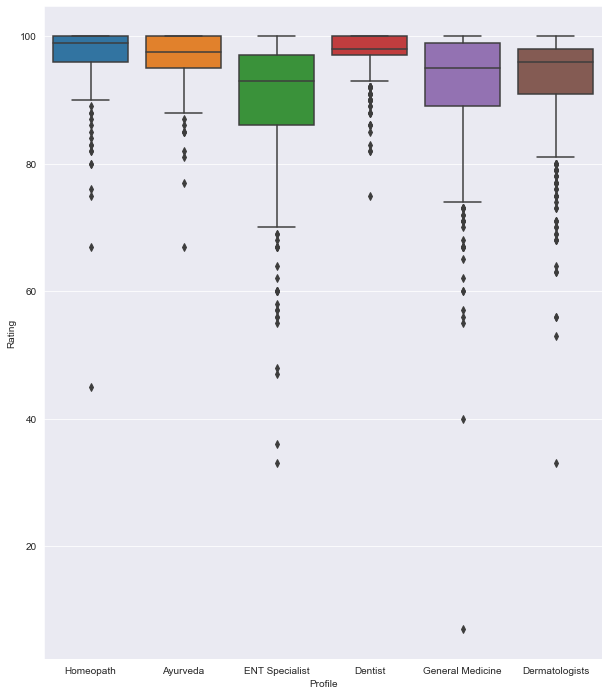

In [46]:
plt.figure(figsize=(10,12))
sns.boxplot(data=train_df,x='Profile',y='Rating')
plt.show()

Will be filling the missing values with the median values for each profile.

In [47]:
profiles=train_df.Profile.unique()
for i in profiles:
    m=train_df.loc[train_df.Profile==i]
    print('Median of {} is {}'.format(i,m.Rating.median()))

Median of Homeopath is 99.0
Median of Ayurveda is 97.5
Median of ENT Specialist is 93.0
Median of Dentist is 98.0
Median of General Medicine is 95.0
Median of Dermatologists is 96.0


In [48]:
# defining a function to impute the missing values

# for training dataset
def impute_train(features):
    Rating = features[0]
    Profile = features[1]
    
    if pd.isnull(Rating):
        
        if Profile == 'Homeopath':
            return 99.0
        elif Profile == 'Ayurveda':
            return 97.5
        elif Profile == 'ENT Specialist':
            return 93.0
        elif Profile == 'Dentist':
            return 98.0
        elif Profile == 'General Medicine':
            return 95.0
        else:
            return 96.0
    else:
        return Rating

    
# for test dataset
def impute_test(features):
    Rating = features[0]
    Profile = features[1]
    
    if pd.isnull(Rating):
        
        if Profile == 'Homeopath':
            return 99.0
        elif Profile == 'Ayurveda':
            return 97.5
        elif Profile == 'ENT Specialist':
            return 93.0
        elif Profile == 'Dentist':
            return 98.0
        elif Profile == 'General Medicine':
            return 95.0
        else:
            return 96.0
    else:
        return Rating
    

In [49]:
# imputing the columns
train_df.Rating = train_df[['Rating','Profile']].apply(impute_train,axis=1)
test_df.Rating = test_df[['Rating','Profile']].apply(impute_test,axis=1)

In [50]:
# checking the values for  null values in City column
train_df[(train_df['City'].isnull()==True)|(train_df['District'].isnull()==True)]

,Qualification,Experience,Rating,Profile,Fees,District,City,No_of_Qualification
91,Get inspired by remarkable stories of people l...,0,96.0,Dermatologists,100,NaN,NaN,1
502,Get inspired by remarkable stories of people l...,0,96.0,Dermatologists,100,NaN,NaN,1
599,Get inspired by remarkable stories of people l...,0,96.0,Dermatologists,100,NaN,NaN,1
605,Get inspired by remarkable stories of people l...,0,96.0,Dermatologists,100,NaN,NaN,1
724,Get inspired by remarkable stories of people l...,0,96.0,Dermatologists,100,NaN,NaN,1
1002,Get inspired by remarkable stories of people l...,0,96.0,Dermatologists,100,NaN,NaN,1
1083,Get inspired by remarkable stories of people l...,0,96.0,Dermatologists,100,NaN,NaN,1
1210,Get inspired by remarkable stories of people l...,0,96.0,Dermatologists,100,NaN,NaN,1
2078,Get inspired by remarkable stories of people l...,0,96.0,Dermatologists,100,NaN,NaN,1
2178,Get inspired by remarkable stories of people l...,0,96.0,Dermatologists,100,NaN,NaN,1


In [51]:
test_df[(test_df['City'].isnull()==True)|(test_df['District'].isnull()==True)]

,Qualification,Experience,Rating,Profile,District,City,No_of_Qualification
381,Get inspired by remarkable stories of people l...,0,96.0,Dermatologists,NaN,NaN,1
1494,Get inspired by remarkable stories of people l...,0,96.0,Dermatologists,NaN,NaN,1
1644,Get inspired by remarkable stories of people l...,0,96.0,Dermatologists,NaN,NaN,1
1838,Get inspired by remarkable stories of people l...,0,96.0,Dermatologists,NaN,NaN,1
1925,Get inspired by remarkable stories of people l...,0,96.0,Dermatologists,NaN,NaN,1
1930,Get inspired by remarkable stories of people l...,0,96.0,Dermatologists,NaN,NaN,1


Since from above we can see that there are no relevant information for the cities will be dropping the missing values for city also with missing values of District column

In [52]:
train_df.dropna(axis=0,inplace=True)
test_df.dropna(axis=0,inplace=True)

In [53]:
train_df.isnull().sum()

Qualification          0
Experience             0
Rating                 0
Profile                0
Fees                   0
District               0
City                   0
No_of_Qualification    0
dtype: int64

In [54]:
test_df.isnull().sum()

Qualification          0
Experience             0
Rating                 0
Profile                0
District               0
City                   0
No_of_Qualification    0
dtype: int64

#### Outlier Detection and Treatment

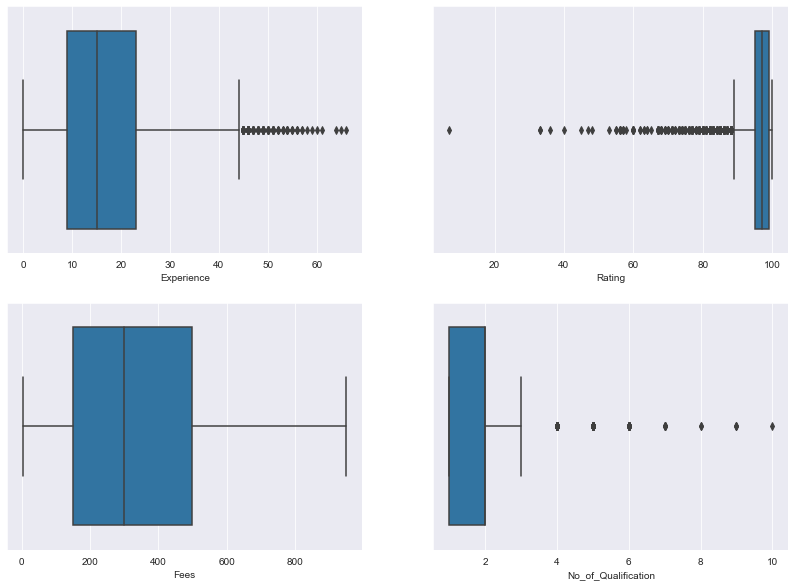

In [55]:
# visualising the outliers in the dataset
plot = 1
plt.figure(figsize=(14,10))
for i in train_df.select_dtypes(exclude='object').columns:
    plt.subplot(2,2,plot)
    sns.boxplot(train_df[i])
    plot=plot+1
plt.show()

From the above plot we can see that there are outliers in the dataset.

In [56]:
# binning the values to treat outliers in the feature

bins=[-10,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]

# train data
train_df['Rating'] = pd.cut(train_df['Rating'], bins=bins, labels=labels, include_lowest=True)
train_df['Rating']=train_df['Rating'].astype(int)

#test data
test_df['Rating'] = pd.cut(test_df['Rating'], bins=bins, labels=labels, include_lowest=True)
test_df['Rating']=test_df['Rating'].astype(int)

In [57]:
# Applying Log transformation to treat the outliers so that it will pul in the larger values due to which we are getting outliers    
train_df.Experience = np.log(train_df.Experience+1)
test_df.Experience = np.log(test_df.Experience+1)

### Feature Engineering

Skewness of the data

In [58]:
train_df.skew()

Experience            -0.767507
Rating                -6.184901
Fees                   0.747349
No_of_Qualification    1.431658
dtype: float64

In [59]:
test_df.skew()

Experience            -0.866773
Rating                -5.054811
No_of_Qualification    2.687162
dtype: float64

Since Rating and Number of Qualifications are discrete variable no need to treat skewness although can see some amount of skewness in Fees so will be treating it 

In [60]:
train_df.head()

,Qualification,Experience,Rating,Profile,Fees,District,City,No_of_Qualification
0,"BHMS, MD - Homeopathy",3.218876,10,Homeopath,100,Kakkanad,Ernakulam,2
1,"BAMS, MD - Ayurveda Medicine",2.564949,10,Ayurveda,350,Whitefield,Bangalore,2
2,"MBBS, MS - Otorhinolaryngology",2.302585,10,ENT Specialist,300,Mathikere - BEL,Bangalore,2
3,"BSc - Zoology, BAMS",2.564949,10,Ayurveda,250,Bannerghatta Road,Bangalore,2
4,BAMS,3.044522,10,Ayurveda,250,Keelkattalai,Chennai,1


In [61]:
test_df.head()

,Qualification,Experience,Rating,Profile,District,City,No_of_Qualification
0,MBBS,3.583519,10,General Medicine,Ghatkopar East,Mumbai,1
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",3.465736,10,ENT Specialist,West Marredpally,Hyderabad,2
2,"MBBS, DDVL",3.713572,7,Dermatologists,KK Nagar,Chennai,2
3,BAMS,0.000000,10,Ayurveda,New Ashok Nagar,Delhi,1
4,"BDS, MDS - Conservative Dentistry & Endodontics",2.833213,10,Dentist,Kanakpura Road,Bangalore,2


train_df.Qualification.value_counts().to_dict()

Encoding the categorical variables

In [62]:
# checking categorical variables
cat

['Qualification', 'Profile', 'District', 'City']

In [63]:
train_df.dtypes

Qualification           object
Experience             float64
Rating                   int64
Profile                 object
Fees                     int64
District                object
City                    object
No_of_Qualification      int64
dtype: object

In [64]:
for col in cat:
    print("{} : {} labels ".format(col,len(train_df[col].unique())))

Qualification : 1419 labels 
Profile : 6 labels 
District : 865 labels 
City : 8 labels 


In [65]:
for col in cat:
    print("{} : {} labels ".format(col,len(test_df[col].unique())))

Qualification : 629 labels 
Profile : 6 labels 
District : 589 labels 
City : 8 labels 


- Will be encoding Profile and City with one hot encoding will be creating dummy variables for them
- Will be Creating Dummy variables for Qualification and District of top 10 most frequent labels as the categorization is very high

In [66]:
# encoding Profile and City

In [67]:
# encoding train dataset
train_encoded = pd.get_dummies(data=train_df,columns=['Profile','City'],drop_first=True)
train_encoded

,Qualification,Experience,Rating,Fees,District,No_of_Qualification,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram
0,"BHMS, MD - Homeopathy",3.218876,10,100,Kakkanad,2,0,0,0,0,1,0,0,0,1,0,0,0
1,"BAMS, MD - Ayurveda Medicine",2.564949,10,350,Whitefield,2,0,0,0,0,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",2.302585,10,300,Mathikere - BEL,2,0,0,1,0,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",2.564949,10,250,Bannerghatta Road,2,0,0,0,0,0,0,0,0,0,0,0,0
4,BAMS,3.044522,10,250,Keelkattalai,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",2.995732,10,300,Basavanagudi,2,0,0,1,0,0,0,0,0,0,0,0,0
5957,MBBS,3.526361,10,100,Nungambakkam,1,0,0,0,1,0,1,0,0,0,0,0,0
5958,MBBS,3.737670,10,600,Greater Kailash Part 2,1,0,0,0,1,0,0,0,1,0,0,0,0
5959,"MBBS, MD - General Medicine",2.772589,9,100,Vileparle West,2,0,0,0,1,0,0,0,0,0,0,1,0


In [68]:
# encoding Qualification 
train_df.Qualification.value_counts().sort_values(ascending=False).head(10)

BDS                                               487
BHMS                                              477
BAMS                                              471
MBBS                                              334
MBBS, MS - ENT                                    220
MBBS, MD - Dermatology                            178
MBBS, MD - General Medicine                       177
MBBS, MD - Dermatology , Venereology & Leprosy    140
BHMS, MD - Homeopathy                              93
MBBS, DDVL                                         91
Name: Qualification, dtype: int64

In [69]:
# making list of top10 frequent categories
Qualification_top10 = [x for x in train_df.Qualification.value_counts().sort_values(ascending=False).head(10).index ]
Qualification_top10

['BDS',
 'BHMS',
 'BAMS',
 'MBBS',
 'MBBS, MS - ENT',
 'MBBS, MD - Dermatology',
 'MBBS, MD - General Medicine',
 'MBBS, MD - Dermatology , Venereology & Leprosy',
 'BHMS, MD - Homeopathy',
 'MBBS, DDVL']

In [70]:
# encoding District
train_df.District.value_counts().sort_values(ascending=False).head(10)

HSR Layout        75
Andheri West      70
Dwarka            68
Banjara Hills     64
Mulund West       54
Borivali West     52
Kandivali West    50
Indiranagar       48
Whitefield        47
Malad West        47
Name: District, dtype: int64

In [71]:
# making list of top10 frequent categories
District_top10 = [x for x in train_df.District.value_counts().sort_values(ascending=False).head(10).index ]
District_top10

['HSR Layout',
 'Andheri West',
 'Dwarka',
 'Banjara Hills',
 'Mulund West',
 'Borivali West',
 'Kandivali West',
 'Indiranagar',
 'Whitefield',
 'Malad West']

In [72]:
# Defining function for encoding categories
def encode_top10(data,feature,top_categories):
    
    for label in top_categories:
        data[feature+'_'+label] = np.where(data[feature]==label,1,0)

In [73]:
encode_top10(train_encoded,'Qualification',Qualification_top10)
train_encoded.head()

,Qualification,Experience,Rating,Fees,District,No_of_Qualification,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,...,Qualification_BDS,Qualification_BHMS,Qualification_BAMS,Qualification_MBBS,"Qualification_MBBS, MS - ENT","Qualification_MBBS, MD - Dermatology","Qualification_MBBS, MD - General Medicine","Qualification_MBBS, MD - Dermatology , Venereology & Leprosy","Qualification_BHMS, MD - Homeopathy","Qualification_MBBS, DDVL"
0,"BHMS, MD - Homeopathy",3.218876,10,100,Kakkanad,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,"BAMS, MD - Ayurveda Medicine",2.564949,10,350,Whitefield,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",2.302585,10,300,Mathikere - BEL,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",2.564949,10,250,Bannerghatta Road,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BAMS,3.044522,10,250,Keelkattalai,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [74]:
encode_top10(train_encoded,'District',District_top10)
train_encoded.head()

,Qualification,Experience,Rating,Fees,District,No_of_Qualification,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,...,District_HSR Layout,District_Andheri West,District_Dwarka,District_Banjara Hills,District_Mulund West,District_Borivali West,District_Kandivali West,District_Indiranagar,District_Whitefield,District_Malad West
0,"BHMS, MD - Homeopathy",3.218876,10,100,Kakkanad,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",2.564949,10,350,Whitefield,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,"MBBS, MS - Otorhinolaryngology",2.302585,10,300,Mathikere - BEL,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",2.564949,10,250,Bannerghatta Road,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BAMS,3.044522,10,250,Keelkattalai,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
train_encoded.drop(['Qualification','District'],axis=1,inplace=True)

In [76]:
train_encoded.head()

,Experience,Rating,Fees,No_of_Qualification,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,...,District_HSR Layout,District_Andheri West,District_Dwarka,District_Banjara Hills,District_Mulund West,District_Borivali West,District_Kandivali West,District_Indiranagar,District_Whitefield,District_Malad West
0,3.218876,10,100,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.564949,10,350,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.302585,10,300,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.564949,10,250,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.044522,10,250,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# encoding test dataset
test_encoded = pd.get_dummies(data=test_df,columns=['Profile','City'],drop_first=True)
test_encoded

,Qualification,Experience,Rating,District,No_of_Qualification,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram
0,MBBS,3.583519,10,Ghatkopar East,1,0,0,0,1,0,0,0,0,0,0,1,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",3.465736,10,West Marredpally,2,0,0,1,0,0,0,0,0,0,1,0,0
2,"MBBS, DDVL",3.713572,7,KK Nagar,2,0,1,0,0,0,1,0,0,0,0,0,0
3,BAMS,0.000000,10,New Ashok Nagar,1,0,0,0,0,0,0,0,1,0,0,0,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",2.833213,10,Kanakpura Road,2,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",2.397895,10,Basavanagudi,2,0,0,0,0,0,0,0,0,0,0,0,0
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",1.609438,10,Choolai,3,0,1,0,0,0,1,0,0,0,0,0,0
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",2.302585,10,Porur,2,0,0,0,1,0,1,0,0,0,0,0,0
1985,BDS,2.564949,10,Arekere,1,1,0,0,0,0,0,0,0,0,0,0,0


In [78]:
# encoding Qualification 
test_df.Qualification.value_counts().sort_values(ascending=False).head(10)

BAMS                                              153
BHMS                                              150
BDS                                               144
MBBS                                              107
MBBS, MD - Dermatology                             64
MBBS, MS - ENT                                     60
MBBS, MD - Dermatology , Venereology & Leprosy     53
MBBS, MD - General Medicine                        50
MBBS, DDVL                                         31
MBBS, Diploma in Otorhinolaryngology (DLO)         30
Name: Qualification, dtype: int64

In [79]:
# making list of top10 frequent categories
Qualification_top10 = [x for x in test_df.Qualification.value_counts().sort_values(ascending=False).head(10).index ]
Qualification_top10

['BAMS',
 'BHMS',
 'BDS',
 'MBBS',
 'MBBS, MD - Dermatology',
 'MBBS, MS - ENT',
 'MBBS, MD - Dermatology , Venereology & Leprosy',
 'MBBS, MD - General Medicine',
 'MBBS, DDVL',
 'MBBS, Diploma in Otorhinolaryngology (DLO)']

In [80]:
# encoding District
test_df.District.value_counts().sort_values(ascending=False).head(10)

Mulund West          27
Andheri West         27
Dwarka               26
Whitefield           23
HSR Layout           22
Banjara Hills        21
Rohini               19
Bannerghatta Road    18
Shalimar Bagh        17
Borivali West        16
Name: District, dtype: int64

In [81]:
# making list of top10 frequent categories
District_top10 = [x for x in test_df.District.value_counts().sort_values(ascending=False).head(10).index ]
District_top10

['Mulund West',
 'Andheri West',
 'Dwarka',
 'Whitefield',
 'HSR Layout',
 'Banjara Hills',
 'Rohini',
 'Bannerghatta Road',
 'Shalimar Bagh',
 'Borivali West']

In [82]:
encode_top10(test_encoded,'Qualification',Qualification_top10)
test_encoded.head()

,Qualification,Experience,Rating,District,No_of_Qualification,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,...,Qualification_BAMS,Qualification_BHMS,Qualification_BDS,Qualification_MBBS,"Qualification_MBBS, MD - Dermatology","Qualification_MBBS, MS - ENT","Qualification_MBBS, MD - Dermatology , Venereology & Leprosy","Qualification_MBBS, MD - General Medicine","Qualification_MBBS, DDVL","Qualification_MBBS, Diploma in Otorhinolaryngology (DLO)"
0,MBBS,3.583519,10,Ghatkopar East,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",3.465736,10,West Marredpally,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,"MBBS, DDVL",3.713572,7,KK Nagar,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,BAMS,0.000000,10,New Ashok Nagar,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",2.833213,10,Kanakpura Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
encode_top10(test_encoded,'District',District_top10)
test_encoded.head()

,Qualification,Experience,Rating,District,No_of_Qualification,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,...,District_Mulund West,District_Andheri West,District_Dwarka,District_Whitefield,District_HSR Layout,District_Banjara Hills,District_Rohini,District_Bannerghatta Road,District_Shalimar Bagh,District_Borivali West
0,MBBS,3.583519,10,Ghatkopar East,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",3.465736,10,West Marredpally,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"MBBS, DDVL",3.713572,7,KK Nagar,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BAMS,0.000000,10,New Ashok Nagar,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",2.833213,10,Kanakpura Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
test_encoded.drop(['Qualification','District'],axis=1,inplace=True)
test_encoded.head()

,Experience,Rating,No_of_Qualification,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,...,District_Mulund West,District_Andheri West,District_Dwarka,District_Whitefield,District_HSR Layout,District_Banjara Hills,District_Rohini,District_Bannerghatta Road,District_Shalimar Bagh,District_Borivali West
0,3.583519,10,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.465736,10,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.713572,7,2,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.833213,10,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


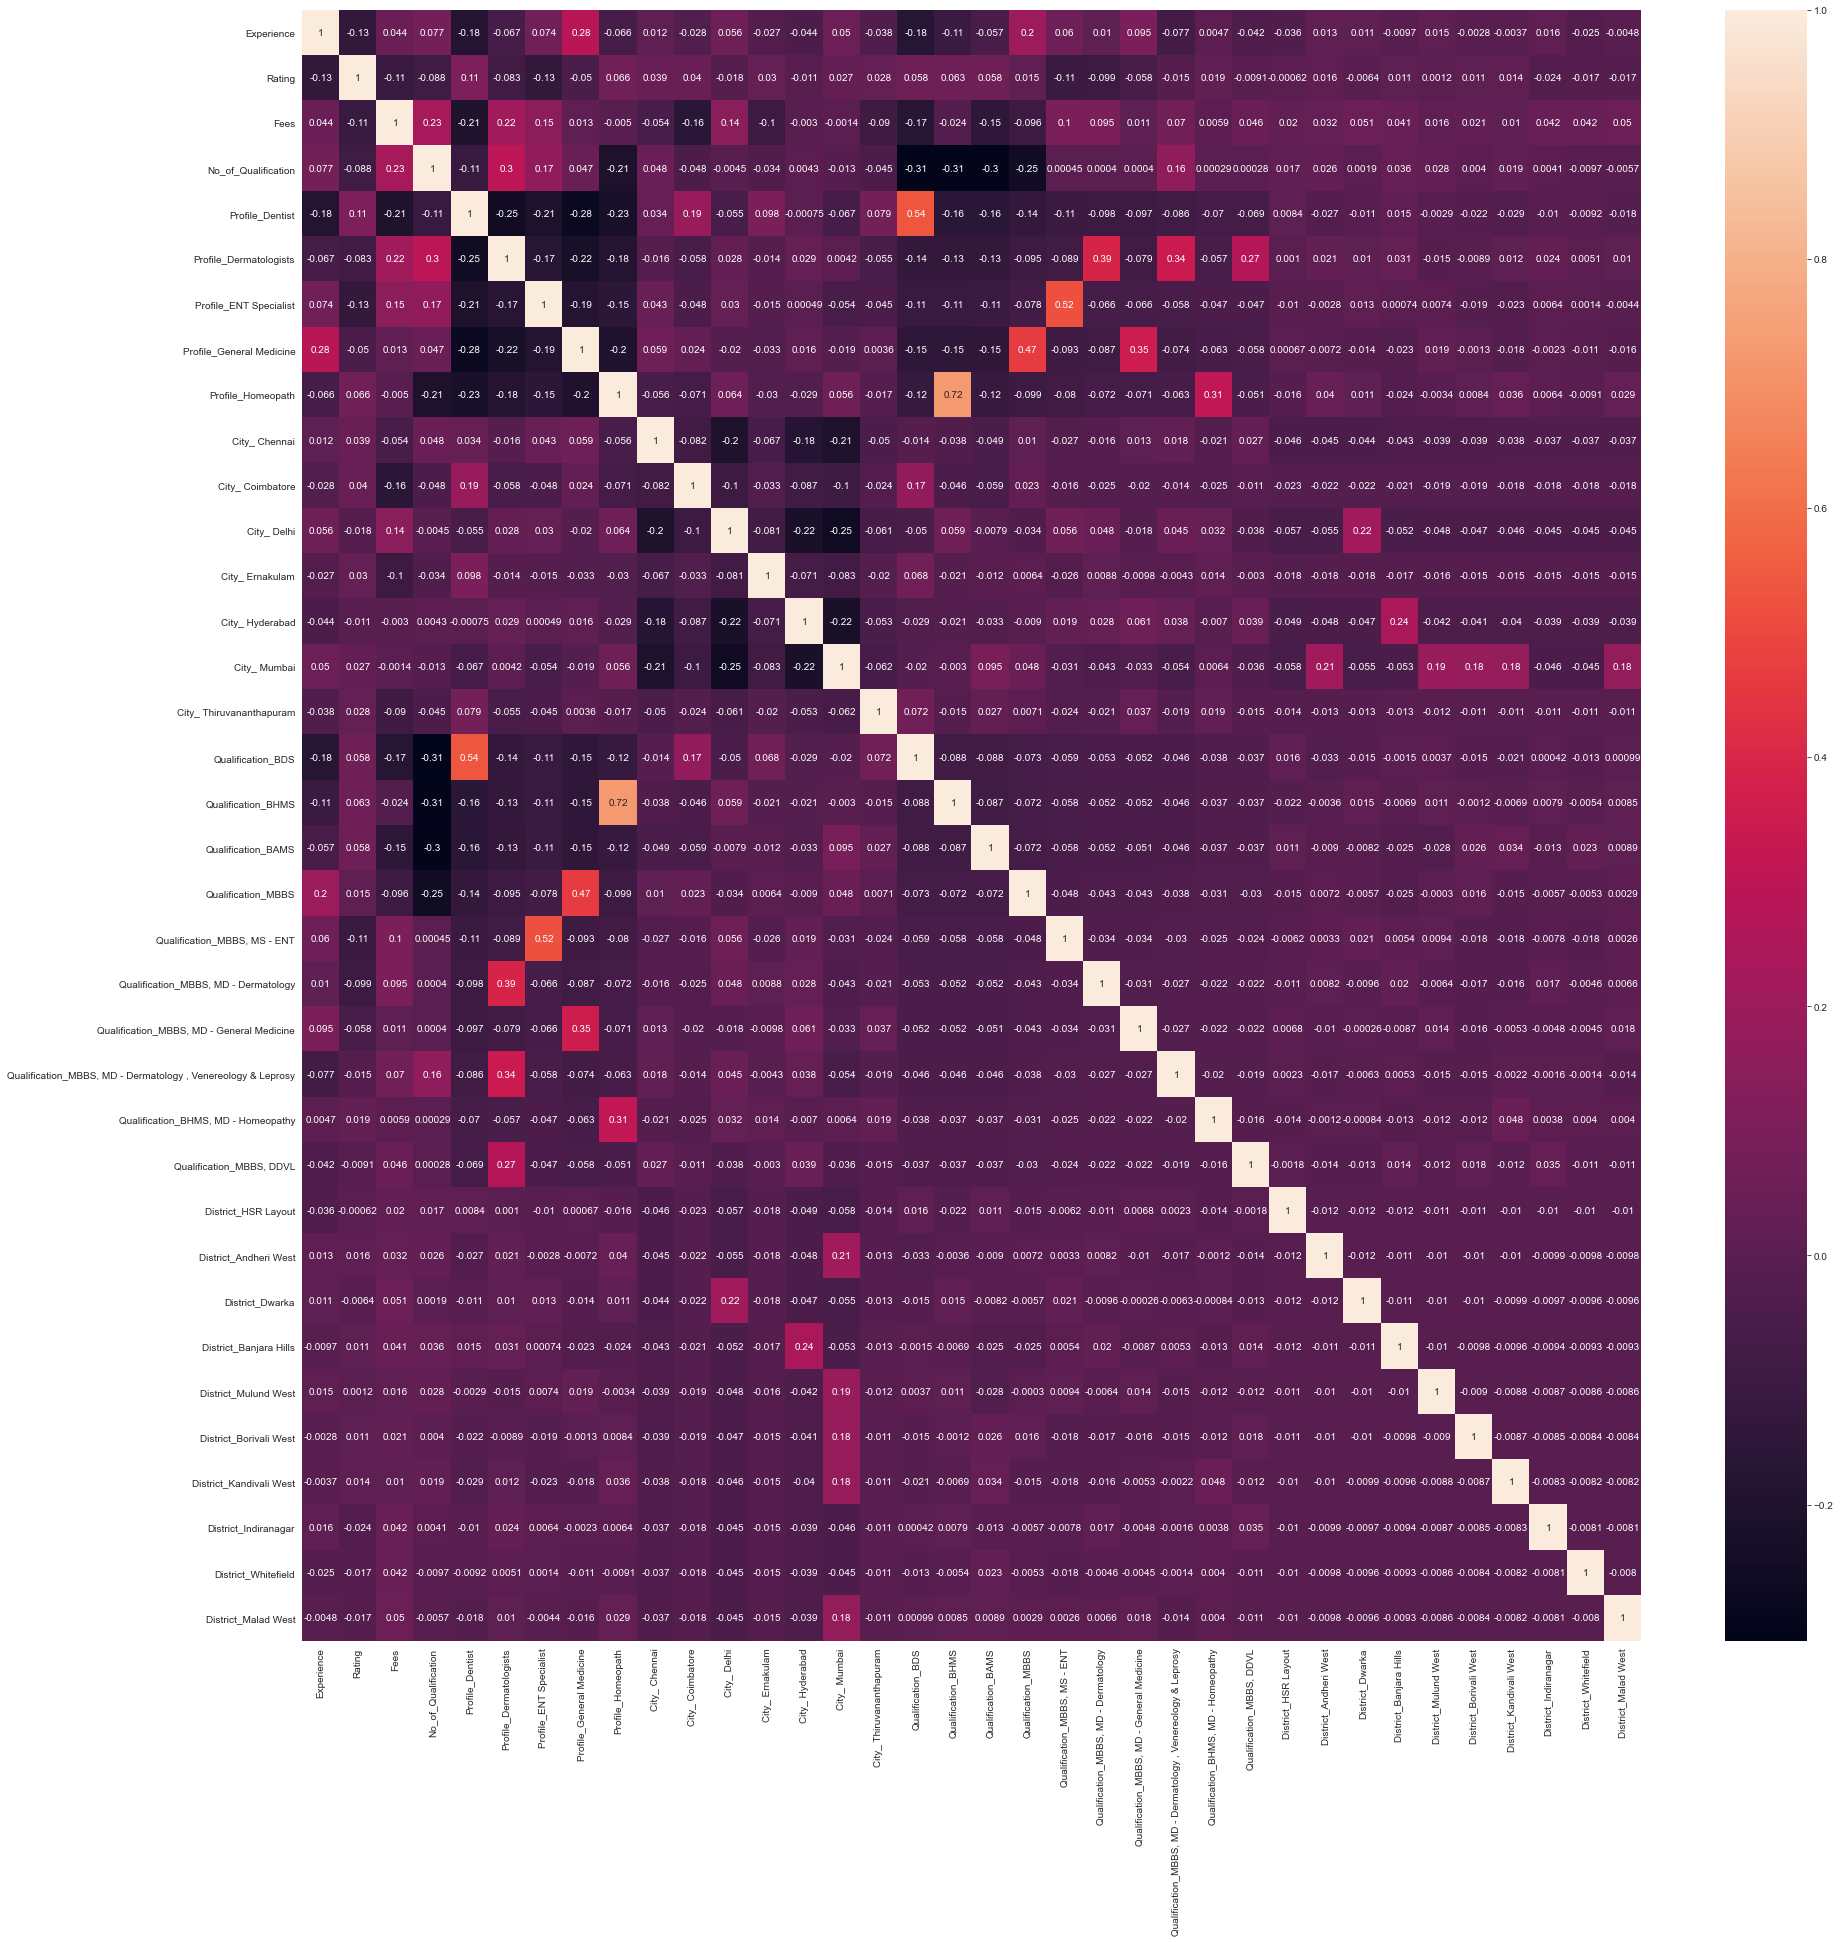

In [85]:
# checking for correlation with new variables
plt.figure(figsize=(30,30))
sns.heatmap(train_encoded.corr(),annot=True)
plt.show()

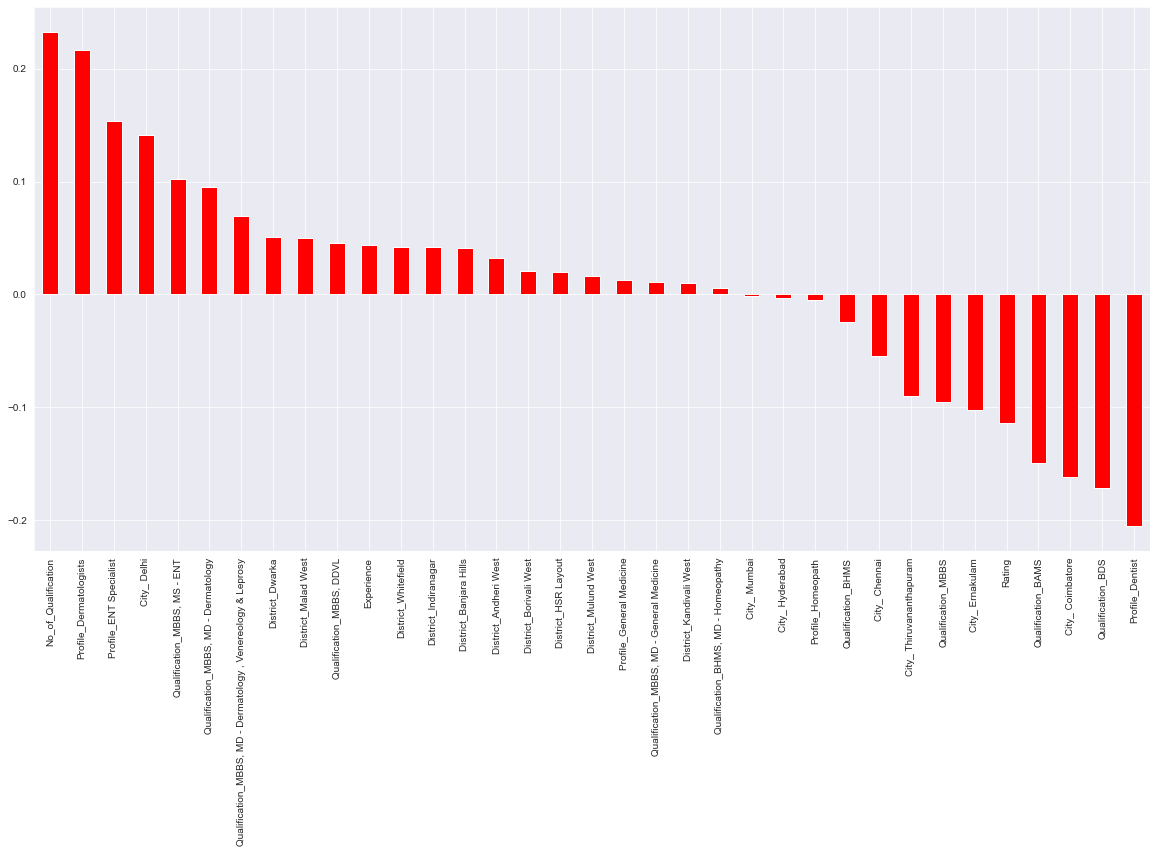

In [86]:
# checking correlation with respect to target variable
plt.figure(figsize=(20,10))
train_encoded.corr().Fees.sort_values(ascending=False).drop('Fees').plot.bar(color='r')
plt.show()

#### Scaling

In [87]:
# splitting into dependent and independent variables
x = train_encoded.drop(['Fees'],axis=1)
y = train_encoded.Fees

In [88]:
# Will be scaling the independent variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled

,Experience,Rating,No_of_Qualification,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,...,District_HSR Layout,District_Andheri West,District_Dwarka,District_Banjara Hills,District_Mulund West,District_Borivali West,District_Kandivali West,District_Indiranagar,District_Whitefield,District_Malad West
0,0.765544,1.000000,0.111111,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.610021,1.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.547623,1.000000,0.111111,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.610021,1.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.724077,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,0.712474,1.000000,0.111111,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5931,0.838673,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5932,0.888928,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5933,0.659403,0.888889,0.111111,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
#### Train/Test Split
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,test_size=0.3,random_state=2)

### Model Building

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [91]:
# intialising all the models
LR = LinearRegression()
KNN = KNeighborsRegressor()
SV = SVR()
DTR = DecisionTreeRegressor()
RTF = RandomForestRegressor()
ADB = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [92]:
# list of model name and instances
models = [("Linear Regression ",LR),
          ("K Nearest Neighbor Regressor ",KNN),
          ("Support Vector Regressor ",SV),
          ("Decision Tree Regressor ",DTR),
          ("Random forest Regressor ",RTF),
          ("AdaBoost Regressor ",ADB),
          ("Gradient Boosting Regressor ",GB)]

##### Training the models 

In [93]:
for name,model in models:
    model.fit(xtrain,ytrain)
    print(name," trained")

Linear Regression   trained
K Nearest Neighbor Regressor   trained
Support Vector Regressor   trained
Decision Tree Regressor   trained
Random forest Regressor   trained
AdaBoost Regressor   trained
Gradient Boosting Regressor   trained


##### Evaluating the models

In [94]:

for name,model in models:
    print("******",name,"******")
    pred=model.predict(xtest)
    print("Train score :",model.score(xtrain,ytrain))
    print("Test score :",model.score(xtest,ytest))
    print('Error :-')
    print('Mean absolute error:', mean_absolute_error(ytest,pred))
    print('Mean squared error:', mean_squared_error(ytest,pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest,pred)))

****** Linear Regression  ******
Train score : 0.19214086780994044
Test score : 0.1771256256014614
Error :-
Mean absolute error: 135.09868586234163
Mean squared error: 30050.98361250465
Root Mean Squared Error: 173.35219529185272
****** K Nearest Neighbor Regressor  ******
Train score : 0.3740253900650702
Test score : 0.039769144983363924
Error :-
Mean absolute error: 142.15216170690624
Mean squared error: 35067.17742841101
Root Mean Squared Error: 187.2623225008464
****** Support Vector Regressor  ******
Train score : 0.07591622588276914
Test score : 0.08055988787452983
Error :-
Mean absolute error: 141.29060623566465
Mean squared error: 33577.518758385835
Root Mean Squared Error: 183.24169492336026
****** Decision Tree Regressor  ******
Train score : 0.785946954477639
Test score : -0.36570462751110844
Error :-
Mean absolute error: 162.86740773419606
Mean squared error: 49874.8881454182
Root Mean Squared Error: 223.32686391345354
****** Random forest Regressor  ******
Train score : 0.

In [95]:
# checking cross validation score
for name,model in models:
    print("******",name,"******")
    crossval= -(cross_val_score(model,x_scaled,y,scoring='neg_root_mean_squared_error',cv=5).mean())
    print(crossval)

****** Linear Regression  ******
173.0284388151219
****** K Nearest Neighbor Regressor  ******
186.39962893717137
****** Support Vector Regressor  ******
182.84364819341164
****** Decision Tree Regressor  ******
228.08042449196506
****** Random forest Regressor  ******
191.4597053685168
****** AdaBoost Regressor  ******
178.53949339526375
****** Gradient Boosting Regressor  ******
171.81559110847348


##### Model Selection : 
- As from the above observations we can see that Gradient boost is performing the best here, because the errors are quite low as compared to the all other models, also the cross validation implies that gradient boost is the best model because of the lowest RMSE compared to other models.

### Hyperparameter tuning

In [96]:
# grid parameters to search
grid_param = {'learning_rate':[0.01,0.05,0.1],
              'max_depth':np.arange(2,12),
              'max_features':['auto', 'sqrt', 'log2'],
              'n_estimators':np.arange(50,200,50),
              'min_samples_leaf':np.arange(30,71,10),
             }
# using randomized search cv for grid search to find best parameters 
random_search = RandomizedSearchCV(GB,grid_param,cv=5,verbose=5)
random_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=30, n_estimators=150;, score=0.196 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=30, n_estimators=150;, score=0.147 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=30, n_estimators=150;, score=0.211 total time=   0.2s
[CV 4/5] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=30, n_estimators=150;, score=0.215 total time=   0.2s
[CV 5/5] END learning_rate=0.05, max_depth=5, max_features=sqrt, min_samples_leaf=30, n_estimators=150;, score=0.172 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=60, n_estimators=50;, score=0.158 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=2, max_features=sqrt, min_samples_leaf=60, n_estimators=50;, score=0.140 total time

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([30, 40, 50, 60, 70]),
                                        'n_estimators': array([ 50, 100, 150])},
                   verbose=5)

In [97]:
# best parameters 
random_search.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 50,
 'max_features': 'sqrt',
 'max_depth': 10,
 'learning_rate': 0.05}

In [98]:
# best estimators 
random_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, max_depth=10, max_features='sqrt',
                          min_samples_leaf=50)

In [99]:
#Tuning model 
tuned_model = GradientBoostingRegressor(learning_rate = 0.1, max_depth=8, max_features='log2', min_samples_leaf=30,
                                        n_estimators=150)
tuned_model.fit(xtrain,ytrain)
tuned_pred = tuned_model.predict(xtest)
print('R2_score',r2_score(ytest,tuned_pred))
print('Mean absolute error:', mean_absolute_error(ytest,tuned_pred))
print('Mean squared error:', mean_squared_error(ytest,tuned_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest,tuned_pred)))

R2_score 0.1908660648572993
Mean absolute error: 133.15837471186686
Mean squared error: 29549.189258770388
Root Mean Squared Error: 171.89877619916433


Since after hyperparameter there is a slight drop in the performance so will be taking the default gradient boosting model into consideration.

#### Prediction for test dataset

In [111]:
prediction = GB.predict(test_encoded)
prediction

array([159.74464892, 226.8829509 , 289.50536203, ..., 331.06865756,
       140.43208824, 283.75195287])

In [112]:
df=pd.DataFrame({'Fees':np.round(prediction,2)})
fees_prediction = pd.concat([test_df,df],axis=1)
fees_prediction.head(10)

,Qualification,Experience,Rating,Profile,District,City,No_of_Qualification,Fees
0,MBBS,3.583519,10.0,General Medicine,Ghatkopar East,Mumbai,1.0,159.74
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",3.465736,10.0,ENT Specialist,West Marredpally,Hyderabad,2.0,226.88
2,"MBBS, DDVL",3.713572,7.0,Dermatologists,KK Nagar,Chennai,2.0,289.51
3,BAMS,0.000000,10.0,Ayurveda,New Ashok Nagar,Delhi,1.0,329.73
4,"BDS, MDS - Conservative Dentistry & Endodontics",2.833213,10.0,Dentist,Kanakpura Road,Bangalore,2.0,163.57
5,"BDS, MDS",2.708050,9.0,Dentist,Velachery,Chennai,2.0,300.12
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",3.178054,10.0,ENT Specialist,Frazer Town,Bangalore,2.0,188.73
7,"BDS, MDS - Pedodontics",2.302585,10.0,Dentist,Attapur,Hyderabad,2.0,201.73
8,"MD - Ayurveda Medicine, BAMS, Yoga Teachers Tr...",2.484907,10.0,Ayurveda,Banashankari,Bangalore,4.0,185.93
9,BHMS,3.806662,10.0,Homeopath,Mayur Vihar Ph-I,Delhi,1.0,131.58


### Saving the model

In [115]:
import joblib
joblib.dump(GB,'fee_consultation.pkl')

['fee_consultation.pkl']